# Testing Algorithm


#### Further References:


In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import sys

import pm4py


sys.path.append("/workspaces/university-petri-nets/")

from backend.compositional_algorithm.compositional_algorithm import check_net_valid
from backend.compositional_algorithm.compositional_algorithm import discover
from backend.compositional_algorithm.compositional_algorithm import is_isomorphic
from backend.compositional_algorithm.compositional_algorithm import is_refinement
from backend.compositional_algorithm.interface_patterns.interface_patterns import (
    INTERFACE_PATTERNS,
)
from backend.compositional_algorithm.split_miner import split_miner
from backend.compositional_algorithm.transformations.transformations import (
    TRANSFORMATIONS,
)

#### 0. Input


In [31]:
log_path = "/workspaces/university-petri-nets/backend/data_catalog/compositional_process_discovery_experiment_data/IP-1/IP-1_initial_log.xes"
algorithm = pm4py.discover_petri_net_inductive
algorithm2 = pm4py.discover_petri_net_alpha
algorithm3 = pm4py.discover_petri_net_heuristics
algorithm4 = split_miner


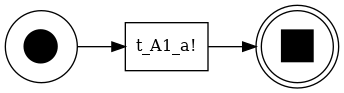

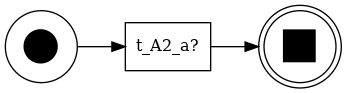

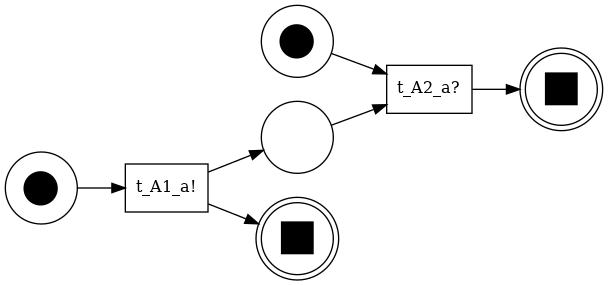

In [32]:
IP1 = INTERFACE_PATTERNS[0]()
ip1_net_a1, ip1_initial_marking_a1, ip1_final_marking_a1 = IP1.get_net("A1")
pm4py.view_petri_net(ip1_net_a1, ip1_initial_marking_a1, ip1_final_marking_a1)

ip1_net_a2, ip1_initial_marking_a2, ip1_final_marking_a2 = IP1.get_net("A2")
pm4py.view_petri_net(ip1_net_a2, ip1_initial_marking_a2, ip1_final_marking_a2)

ip1_net, ip1_initial_marking, ip1_final_marking = IP1.get_net("IP1")
pm4py.view_petri_net(ip1_net, ip1_initial_marking, ip1_final_marking)

#### 1. Directly Discover with the given input


In [33]:
# net, initial_marking, final_marking = discover(log_path, algorithm4)
# pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

parsing log, completed traces ::   0%|          | 0/5000 [00:00<?, ?it/s]

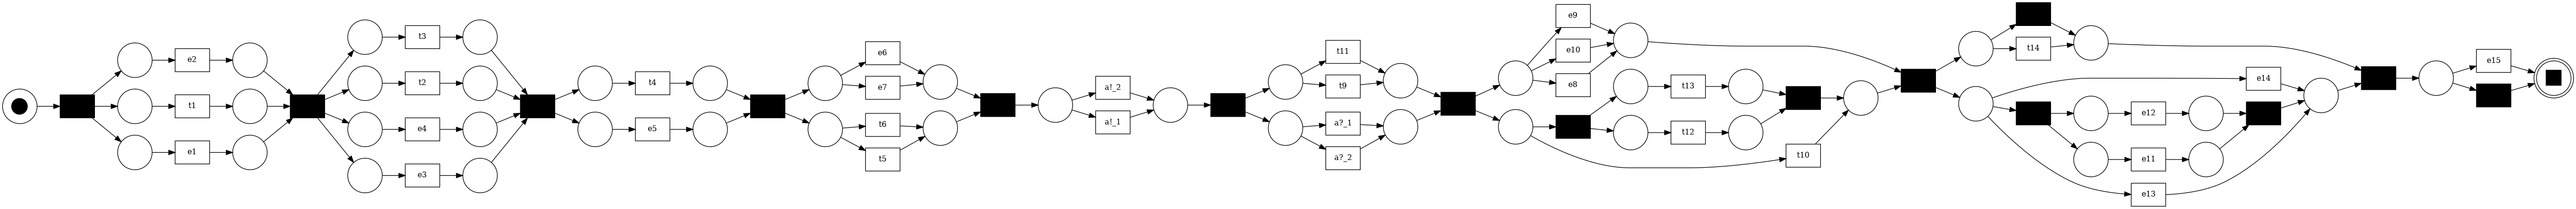

In [34]:
net, initial_marking, final_marking = discover(log_path, algorithm)
pm4py.view_petri_net(net, initial_marking, final_marking, format="png")

#### 2. Check Net is valid


In [35]:
assert check_net_valid(net, net) is True

#### 3. Check Nets are equal


In [36]:
assert is_isomorphic(net, net) is True

#### 4. Check is Refinement


refining at place p_28


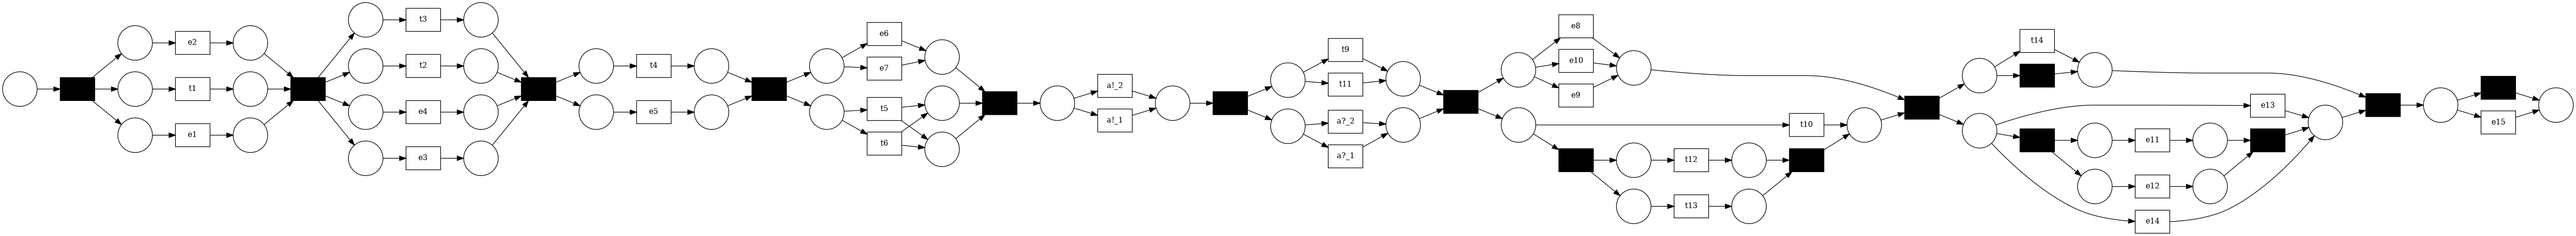

In [37]:
copy_refine_net = net.__deepcopy__()

places = list(copy_refine_net.places)
P1 = TRANSFORMATIONS[0]
new_net = P1.refine(places[2], copy_refine_net)

print(f"refining at place {places[2]}")
pm4py.view_petri_net(new_net, initial_marking, final_marking, format="png")

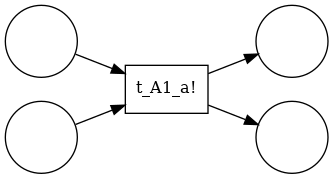

In [38]:
# Define the transformations to apply
transformations = TRANSFORMATIONS[0:1]  # Adjust this as needed

# Make a deep copy of the original net
copy_net = ip1_net_a1.__deepcopy__()

# Apply each transformation sequentially
for transformation in transformations:
    new_copy_net = copy_net.__deepcopy__()  # Make a new deep copy for each transformation
    for place in copy_net.places:
        new_copy_net = transformation.refine(place, new_copy_net)
    copy_net = new_copy_net  # Update copy_net to the latest transformed net

pm4py.view_petri_net(copy_net, initial_marking, final_marking, format="png")

In [39]:
is_ref, path = is_refinement(net, net, TRANSFORMATIONS)
assert is_ref is True

2024-09-18 10:55:27,621 - INFO - The nets are initially isomorphic.


In [41]:
assert not is_isomorphic(net, new_net)

is_ref, path = is_refinement(net, new_net, TRANSFORMATIONS)
print(is_ref, path)  # noqa: T201

Processing Queue: 0it [00:00, ?it/s]2024-09-18 10:55:33,680 - INFO - The nets are isomorphic (P).
Processing Queue: 1it [00:05,  5.26s/it]

True [(<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_26)]


In [42]:
assert not is_isomorphic(net, copy_net)

is_ref, path = is_refinement(ip1_net_a1, copy_net, TRANSFORMATIONS)
print(is_ref, path)  # noqa: T201

Processing Queue: 0it [00:00, ?it/s]2024-09-18 10:55:34,142 - INFO - The nets are isomorphic (P).
Processing Queue: 2it [00:00, 83.35it/s]

True [(<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_A1_1), (<class 'backend.compositional_algorithm.transformations.transformations.P1'>, p_A1_2)]


In [43]:
# is_ref, path = is_refinement(ip1_net_a1, net, TRANSFORMATIONS)
# print(is_ref, path)  # noqa: T201